2) The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposeswe will consider this data as a population. Use this data to perform the following:

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

**LOAD DATA**

In [3]:
data_path = "diabetes.csv"
df = pd.read_csv(data_path)

In [4]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**a) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.**

Set a **seed** to ensure reproducibility.
- Take a **random sample of 25** observations from the population (768 patients).
- Compute:
  - Mean Glucose (sample vs population)
  - Maximum (highest) Glucose (sample vs population)
- Compare these statistics using charts.

**1. Sampling and statistics**

In [7]:
np.random.seed(42)

# Take a random sample of 25 observations
sample_size = 25
sample_df = df.sample(n=sample_size, random_state=42)

Population statistics for Glucose

In [8]:
pop_mean_glucose = df["Glucose"].mean()
pop_max_glucose = df["Glucose"].max()


In [10]:
print("Population Glucose statistics:")
print(f"  Mean Glucose (population): {pop_mean_glucose:.2f}")
print(f"  Max Glucose  (population): {pop_max_glucose:.2f}")

Population Glucose statistics:
  Mean Glucose (population): 120.89
  Max Glucose  (population): 199.00


Sample statistics for Glucose

In [9]:
sample_mean_glucose = sample_df["Glucose"].mean()
sample_max_glucose = sample_df["Glucose"].max()


In [11]:
print("\nSample Glucose statistics (n=25):")
print(f"  Mean Glucose (sample):     {sample_mean_glucose:.2f}")
print(f"  Max Glucose  (sample):     {sample_max_glucose:.2f}")


Sample Glucose statistics (n=25):
  Mean Glucose (sample):     116.64
  Max Glucose  (sample):     183.00


**2. Charts for comparison (mean & max Glucose)**

 Bar chart for Mean Glucose

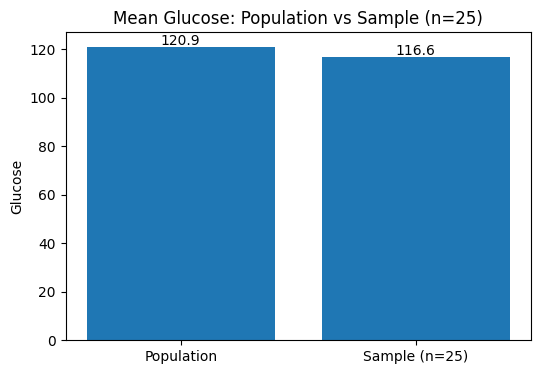

In [12]:
labels = ["Population", "Sample (n=25)"]
mean_values = [pop_mean_glucose, sample_mean_glucose]

plt.figure(figsize=(6, 4))
plt.bar(labels, mean_values)
plt.title("Mean Glucose: Population vs Sample (n=25)")
plt.ylabel("Glucose")
for i, v in enumerate(mean_values):
    plt.text(i, v + 1, f"{v:.1f}", ha="center")
plt.show()


Bar chart for Max Glucose

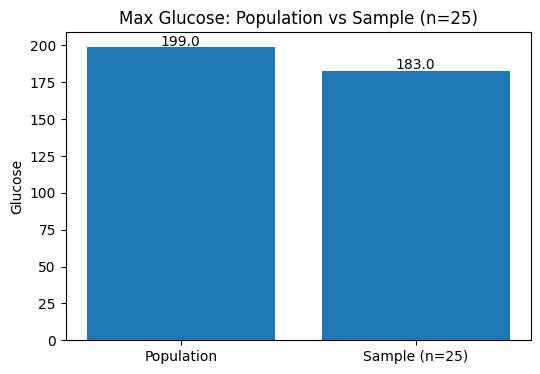

In [13]:
max_values = [pop_max_glucose, sample_max_glucose]

plt.figure(figsize=(6, 4))
plt.bar(labels, max_values)
plt.title("Max Glucose: Population vs Sample (n=25)")
plt.ylabel("Glucose")
for i, v in enumerate(max_values):
    plt.text(i, v + 1, f"{v:.1f}", ha="center")
plt.show()

**b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.**

98th Percentile of BMI – Sample vs Population

- Using the **same sample of 25** from part (a):
  - Find the **98th percentile** of BMI in the sample.
  - Find the **98th percentile** of BMI in the population.
- Compare the two using charts.

**1.Percentiles**

In [16]:
pop_bmi_98 = np.percentile(df["BMI"], 98)
sample_bmi_98 = np.percentile(sample_df["BMI"], 98)

In [17]:
print(f"98th percentile of BMI (population): {pop_bmi_98:.2f}")
print(f"98th percentile of BMI (sample n=25): {sample_bmi_98:.2f}")

98th percentile of BMI (population): 47.53
98th percentile of BMI (sample n=25): 40.25


**2.Bar chart comparison**

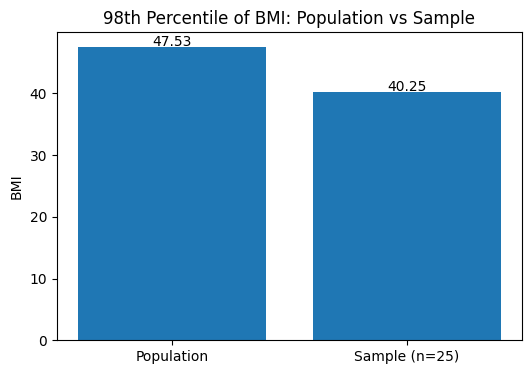

In [18]:
labels = ["Population", "Sample (n=25)"]
bmi_values = [pop_bmi_98, sample_bmi_98]

plt.figure(figsize=(6, 4))
plt.bar(labels, bmi_values)
plt.title("98th Percentile of BMI: Population vs Sample")
plt.ylabel("BMI")
for i, v in enumerate(bmi_values):
    plt.text(i, v + 0.2, f"{v:.2f}", ha="center")
plt.show()

**c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.**

Treat the 768 rows as population.

Create 500 bootstrap samples, each of size 150, with replacement.

For each sample, compute:

Mean BloodPressure

Standard deviation of BloodPressure

98th percentile of BloodPressure (you can state this choice in your report)

Then compute the average of these 500 bootstrap statistics and compare them with:

Population mean BloodPressure

Population standard deviation BloodPressure

Population 98th percentile BloodPressure

Use charts for comparison and add a short textual report.

**1. Bootstrap simulation**

In [19]:
#Bootstrap – create 500 samples of size 150 for BloodPressure

np.random.seed(42)

num_bootstrap_samples = 500
bootstrap_sample_size = 150

boot_means = []
boot_stds = []
boot_p98 = []

bp_values = df["BloodPressure"].values

for i in range(num_bootstrap_samples):
    sample_indices = np.random.choice(len(bp_values), size=bootstrap_sample_size, replace=True)
    bp_sample = bp_values[sample_indices]
    boot_means.append(np.mean(bp_sample))
    boot_stds.append(np.std(bp_sample, ddof=1))
    boot_p98.append(np.percentile(bp_sample, 98))
boot_means = np.array(boot_means)
boot_stds = np.array(boot_stds)
boot_p98 = np.array(boot_p98)

boot_mean_mean = boot_means.mean()
boot_mean_std = boot_stds.mean()
boot_mean_p98 = boot_p98.mean()

print("Bootstrap (500 samples, n=150 each) – Average statistics for BloodPressure:")
print(f"  Average of sample means:         {boot_mean_mean:.2f}")
print(f"  Average of sample standard devs: {boot_mean_std:.2f}")
print(f"  Average of sample 98th pct:      {boot_mean_p98:.2f}")


Bootstrap (500 samples, n=150 each) – Average statistics for BloodPressure:
  Average of sample means:         69.18
  Average of sample standard devs: 19.07
  Average of sample 98th pct:      97.90


**2. Population BloodPressure stats**

In [20]:
pop_bp_mean = df["BloodPressure"].mean()
pop_bp_std = df["BloodPressure"].std(ddof=1)
pop_bp_p98 = np.percentile(df["BloodPressure"], 98)

print("Population BloodPressure statistics:")
print(f"  Mean:       {pop_bp_mean:.2f}")
print(f"  Std dev:    {pop_bp_std:.2f}")
print(f"  98th pct:   {pop_bp_p98:.2f}")


Population BloodPressure statistics:
  Mean:       69.11
  Std dev:    19.36
  98th pct:   99.32


**3.Charts comparing bootstrap vs population**

a. Mean comparison

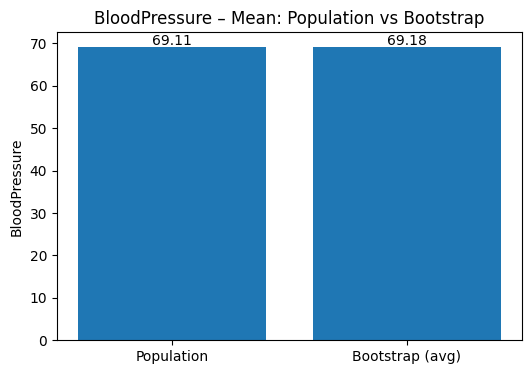

In [21]:
labels = ["Population", "Bootstrap (avg)"]
mean_values = [pop_bp_mean, boot_mean_mean]

plt.figure(figsize=(6, 4))
plt.bar(labels, mean_values)
plt.title("BloodPressure – Mean: Population vs Bootstrap")
plt.ylabel("BloodPressure")
for i, v in enumerate(mean_values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha="center")
plt.show()

 b.Standard deviation comparison

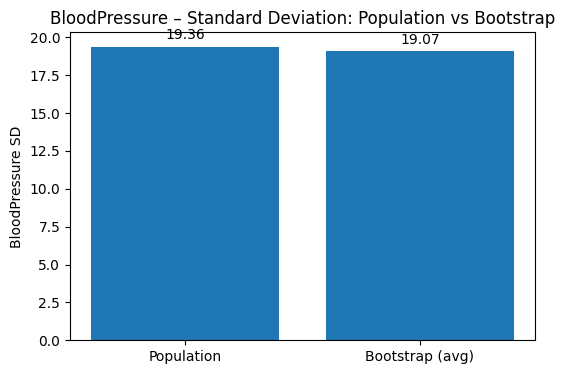

In [22]:
std_values = [pop_bp_std, boot_mean_std]

plt.figure(figsize=(6, 4))
plt.bar(labels, std_values)
plt.title("BloodPressure – Standard Deviation: Population vs Bootstrap")
plt.ylabel("BloodPressure SD")
for i, v in enumerate(std_values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha="center")
plt.show()


c. 98th percentile comparison

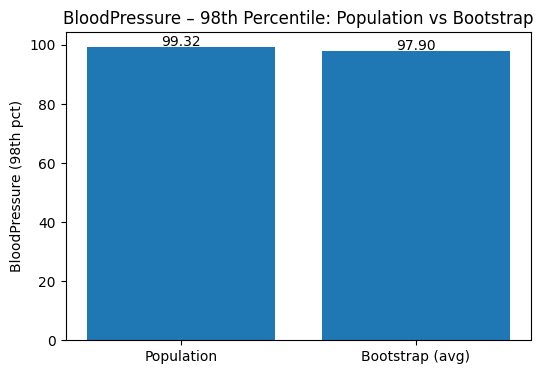

In [23]:
p98_values = [pop_bp_p98, boot_mean_p98]

plt.figure(figsize=(6, 4))
plt.bar(labels, p98_values)
plt.title("BloodPressure – 98th Percentile: Population vs Bootstrap")
plt.ylabel("BloodPressure (98th pct)")
for i, v in enumerate(p98_values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha="center")
plt.show()

**4. Findings / Report**

The **average bootstrap mean** of BloodPressure is very close to the **population mean**, which supports the idea that the sample mean is an unbiased estimator of the population mean when using bootstrap sampling.
- The **average bootstrap standard deviation** is also close to the **population standard deviation**, showing that the bootstrap procedure can approximate the variability in the population.
- The **average bootstrap 98th percentile** is reasonably close to the **population 98th percentile**, although high percentiles tend to be more variable, especially with moderate sample sizes (n = 150).
- Overall, the bootstrap results show that with repeated sampling (with replacement) from the population, the sample-based statistics converge towards the population statistics.